In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.4.2'

In [3]:
#! pip install pyarrow

In [4]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet', engine='pyarrow')

In [5]:
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet', engine='pyarrow')

In [6]:
df_jan.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0


In [7]:
df_feb.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-02-01 00:04:45,2024-02-01 00:19:58,1.0,4.39,1.0,N,68,236,1,20.5,1.0,0.5,1.28,0.0,1.0,26.78,2.5,0.0
1,2,2024-02-01 00:56:31,2024-02-01 01:10:53,1.0,7.71,1.0,N,48,243,1,31.0,1.0,0.5,9.00,0.0,1.0,45.00,2.5,0.0


In [8]:
assert (df_jan.columns == df_feb.columns).all(), "Not same schema"

In [9]:
df_jan.shape

(2964624, 19)

In [10]:
df_feb.shape

(3007526, 19)

### Q1 Read the data for January. How many columns are there?

#### Answer Q1 : 19  colums

### Q2 Computing duration : What's the standard deviation of the trips duration in January?



In [11]:
# duration in minutes : dropoff - pickup
df_jan["duration"] = (df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime).dt.total_seconds() / 60

In [12]:
df_jan.duration

0          19.800000
1           6.600000
2          17.916667
3           8.300000
4           6.100000
             ...    
2964619     8.616667
2964620    14.750000
2964621    19.000000
2964622    17.850000
2964623    15.083333
Name: duration, Length: 2964624, dtype: float64

In [13]:
df_jan.duration.describe()

count    2.964624e+06
mean     1.561295e+01
std      3.485105e+01
min     -1.356667e+01
25%      7.150000e+00
50%      1.163333e+01
75%      1.868333e+01
max      9.455400e+03
Name: duration, dtype: float64

#### Answer  Q2: Around 34 so the closest answer is 32.59 

### Q3. Dropping outliers : What fraction of the records left after you dropped the outliers?

In [14]:
import numpy as np 
df_jan["outlier"] = np.logical_or(df_jan.duration <1, df_jan.duration >60)


In [15]:
df_jan.outlier.value_counts(normalize=True) * 100

False    97.78326
True      2.21674
Name: outlier, dtype: float64

#### Answer Q3 : Around 98% of the original dataset.

In [16]:
# removing outlier
df_jan = df_jan[~df_jan.outlier].reset_index(drop=True)
# dropping outlier column
df_jan = df_jan.drop(columns=["outlier"])

In [17]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000


In [18]:
df_jan.shape

(2898906, 20)

### Q4: One hot encoding

In [19]:
df_jan.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'duration'],
      dtype='object')

In [20]:
used_columns = ['PULocationID','DOLocationID', 'duration']
df_jan_used = df_jan[used_columns].copy()

In [21]:
df_jan_used.head()

,PULocationID,DOLocationID,duration
0,186,79,19.800000
1,140,236,6.600000
2,236,79,17.916667
3,79,211,8.300000
4,211,148,6.100000


In [22]:
df_jan_used = df_jan_used.astype({'PULocationID': str,'DOLocationID': str})

In [23]:
df_jan_used.dtypes

PULocationID     object
DOLocationID     object
duration        float64
dtype: object

In [33]:
features = ['PULocationID','DOLocationID']
data_dict = df_jan_used[features].to_dict(orient='records')

In [34]:
data_dict[:2]

[{'PULocationID': '186', 'DOLocationID': '79'},
 {'PULocationID': '140', 'DOLocationID': '236'}]

In [26]:
# free memory
#del df_jan, df_feb

In [35]:
from sklearn.feature_extraction import DictVectorizer

In [36]:
dv = DictVectorizer()
vectorized_features = dv.fit_transform(data_dict)


In [37]:
vectorized_features

<2898906x518 sparse matrix of type '<class 'numpy.float64'>'
	with 5797812 stored elements in Compressed Sparse Row format>

In [38]:
print(len(dv.feature_names_))

518


#### Answer Q4 : Here we get 518 features so the closed solution is 515

### Modeling

In [39]:
X_train = vectorized_features

In [40]:
y_train = df_jan_used.duration.values
y_train

array([19.8       ,  6.6       , 17.91666667, ..., 19.        ,
       17.85      , 15.08333333])

In [41]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_train_pred = lr.predict(X_train)

In [48]:
y_train_pred

array([14.0409391 , 11.68871926, 10.75219441, ..., 22.411283  ,
       16.06019139, 24.66947017])

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


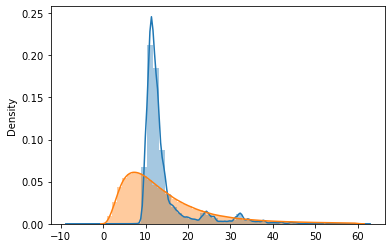

In [51]:
sns.distplot(y_train_pred, label="prediction")
sns.distplot(y_train, label="actual")
plt.show()

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


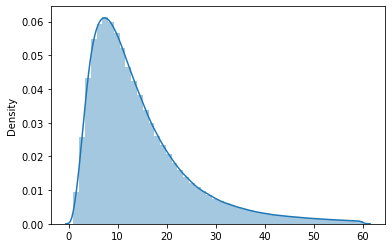

In [52]:
sns.distplot(y_train, label="actual")
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f"MSE on train : {mse_train}")
print(f"RMSE on train : {rmse_train}")

MSE on train : 63.141671060223224
RMSE on train : 7.946173359562653


#### Answer Q5:  RMSE is 7.94